<a href="https://colab.research.google.com/github/amlanmohanty1/Image-Classifier-using-Machine-Learning/blob/main/Image_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
import bing_image_downloader

In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
!mkdir images1

mkdir: cannot create directory ‘images1’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download('motor bikes', limit=100,  output_dir='images1', adult_filter_off=False,force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 14 Images on Page 1.


[%] Downloading Image #1 from https://classic-motorbikes.net/wp-content/uploads/2015/10/13391.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://classic-motorbikes.net/wp-content/uploads/2015/10/13376.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://flashbak.com/wp-content/uploads/2015/10/542365713.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/f2/0b/c2/f20bc2c554a7a5443e359247b7cbb268--triumph-motorcycles-celebs.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://media.karousell.com/media/photos/products/2018/12/03/braun_buffel_leather_wallet_mens_with_original_box_and_certificate_1543851096_b252ee99.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://bestanimations.com/Transport/Bikes/Motorbikes/motorcycle-animated-gif-22.gif
[Error]Invalid image, not saving http://bestanimations.com/Transport/Bikes/Motorbikes/motorcycle-animated-gif-22.

In [ ]:
from bing_image_downloader import downloader
downloader.download('cars', limit=100,  output_dir='images1', adult_filter_off=False,force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 100 Images on Page 1.


[%] Downloading Image #1 from https://www.motortrend.com/uploads/sites/5/2019/12/MotorTrend-Most-Important-Cars-of-the-Decade.jpg
[!] Issue getting: https://www.motortrend.com/uploads/sites/5/2019/12/MotorTrend-Most-Important-Cars-of-the-Decade.jpg
[!] Error:: The read operation timed out
[%] Downloading Image #1 from https://pictures.topspeed.com/IMG/jpg/201807/5-modern-sports-cars.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.autocar.co.uk/sites/autocar.co.uk/files/styles/gallery_slide/public/images/car-reviews/first-drives/legacy/1-porsche-taycan-turbo-s-2020-fd-hero-front_0.jpg?itok=K3DnPo_R
[%] File Downloaded !

[%] Downloading Image #3 from https://www.topgear.com/sites/default/files/styles/16x9_1280w/public/news-listicle/image/2015/11/row_0804.jpg?itok=WBynM_Uo
[%] File Downloaded !

[%] Downloading Image #4 from http://s1.cdn.autoevolution.com/images/news/gallery/consumer-reports-best-worst-cars

In [ ]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [57]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = []   # In matrix format
flat_data = []  # In vector format

DATADIR = '/content/drive/My Drive/images1'
CATEGORIES = ['motor bikes','cars']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,random_state=0)
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C': [1,10,100,100], 'kernel': ['linear']},
            {'C': [1,10,100,100], 'gamma': [0.001,0.0001], 'kernel': ['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [61]:
y_pred = clf.predict(x_test)

In [62]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [63]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7058823529411765

In [65]:

# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [66]:
model = pickle.load(open('img_model.p','rb'))

Enter your urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRAhr316wRrEEkVP3p4_7IjhrmKDOd9j_I8cw&usqp=CAU
Predicted output: motor bikes


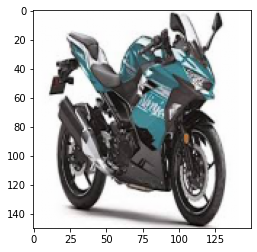

In [67]:
flat_data=[]
url = input("Enter your url")
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f"Predicted output: {y_out}")

In [68]:
!pip install streamlit

!pip install pyngrok===4.1.1
from pyngrok import ngrok

In [70]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle 
from PIL import Image
#import matplotlib.pyplot as plt
#import os


 
st.set_option('deprecation.showfileUploaderEncoding', False)
st.set_page_config(page_title="Image Classification Web App",page_icon="",layout="centered",initial_sidebar_state="expanded")
st.title('Image Classifier using Machine Learning')
st.subheader('by Amlan Mohanty ')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

st.markdown("""
<style>
body {
    color: #000099;
    background-color: #669999;
    etc. 
}
</style>
    """, unsafe_allow_html=True)


uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')



  if st.button('PREDICT'):
    CATEGORIES = ['motor bike','car']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q =model.predict_proba(flat_data)
    #for index, item in enumerate(CATEGORIES):
      #st.write(f'{item} : {q[0][index]*100}%')


st.sidebar.subheader("About App")

st.sidebar.info("This web app is made as part of Image Classification Project")
st.sidebar.info("Browse the image you want to upload or simply drag and drop the image")
st.sidebar.info("Click on the 'Predict' button to check whether the uploaded image is of 'Bike' or 'Car' ")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=10,step=1)

if feedback:
  st.header("Thank you for rating the app!")

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://5db7f1b9ad37.ngrok.io'